# EEG-GAN v2.0 Classification Results
## (Temporary description for testing)

EEG-GAN uses Generative Adversarial Networks (GANs) to create trial-level synthetic EEG samples. We can then use these samples as extra data to train whichever classifier we want to use (e.g., Support Vector Machine, Neural Network).

## Data Augmentation
Although we have shown GANs to be successful in augmenting classification performance, we have not thoroughly tested it's impact compared to any benchmarks... until now. The following plot will allow you to visualize the performance of our classifications across many analyses:

<br>

<u>**Non-Augmented**</u>: These are the data untouched
*   **Empirical**: This is non-augmented data. A baseline to test augmentation 
*   **Oversampled**: This technique simply duplicates samples to increase training

<br>

<u>**Generative Augmentation**</u>: These are generative models that are used to create 'synthetic participants', which increases the training dataset size.
*   **GAN-Augmented**: This is augmentation using GANs via the EEG-GAN package
*   **VAE-Augmented**: This is augmentation using variational autoencoders

<br>

<u>**Transformation Augmentation**</u>: These are standard transformations of the data that are traditionally used to augment datasets for classification.
*   **Gaussian-Augmented**: Adding guassian noise to samples
*   **Flip-Augmented**: Flip the polarity/sign of the data
*   **Reverse-Augmented**: Reverses the timeseries 
*   **Smooth-Augmented**: Removes portions of the data

## Using This Interactive Plot

The plot will default to a bar chart including all aforementioned analyses/augmentations across 5 classifiers (neural network, support vector machine, logistic regression, random forest, k-nearest neighbors) and 7 sample sizes (5, 10, 15, 20, 30, 60, 100). In addition, we have repeated these analyses when using different numbers of electrodes (1, 2, 8). Alongside these main plots are mini-plots (to the right), which will by default be empty.

You will see three dropdowns (Electrodes, Select, Remove) and two buttons (Centered, Axis Type). The electrodes dropdown allows you to select which analyses to view, dependent on the number of electrodes.

The power of this plot comes from the Select and Remove dropdowns. At start, the Select dropdown will have all possible analyses and the Remove dropdown will be empty. When you select an analysis, the plot will highlight this analysis in the form of a line chart. You can now remove this analysis using the remove dropdown. You will also notice that the plots on the right become populated when you select one or more analyses. If you select only one, then the plots simply depict the performance of that analysis. Once you have selected a second analysis, it will show the difference between the two. If you choose more than two analyses, it will display the difference of the earliest two selected. 

At this point, the centered button is by default unclicked. This means that when you select an analysis, it will plot the line chart respective to the corresponding bar location. If you click the centered button, it will rather place all line charts centered on the corresponding sample size, so they are easier to compare. 

The axis type button is also unclicked. This changes the x-axis formatting. By default, the samples sizes are equally spaced on the x-axis. This is easier to read, but technically incorrect since the different sample size conditions are not equally spaced. Clicking this button will reformat the plot to use a continuous x-axis so that the sample sizes are spaced literally (i.e., going from sample size 5 to 10 is a smaller gap than going from sample size 30 to 60). 

Try it out!

Dropdown(description='Electrodes', options=('1', '2', '8'), value='1')

Dropdown(description='Select', options=(' ', 'All', 'VAE-Augmented', 'Gaussian-Augmented', 'Flip-Augmented', '…

Dropdown(description='Remove', options=(' ', 'All', 'Empirical', 'Oversampled-Augmented', 'GAN-Augmented'), va…

ToggleButton(value=False, description='Centered')

ToggleButton(value=True, description='Axis Type')

Selected methods: Empirical, Oversampled-Augmented, GAN-Augmented


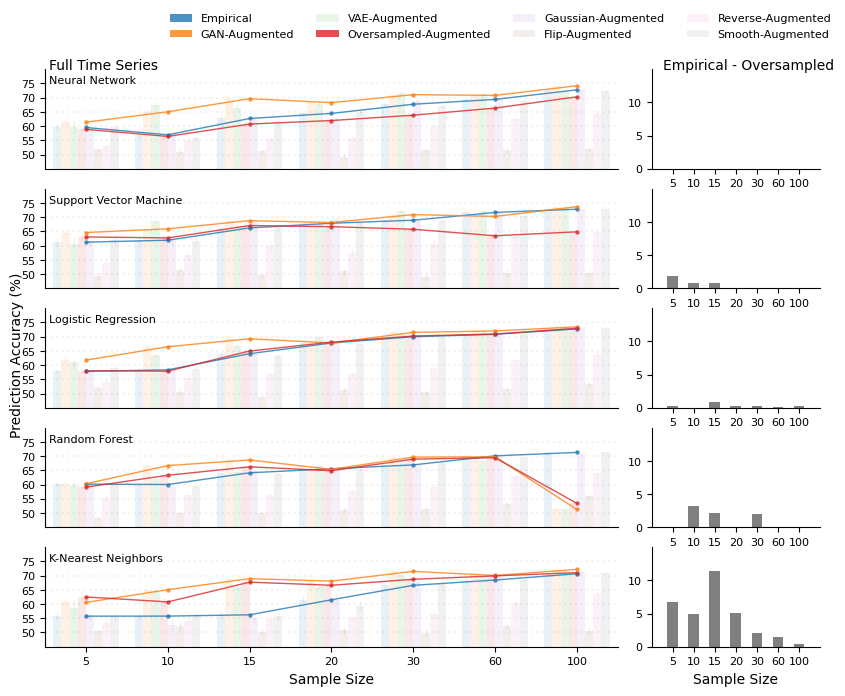

In [ ]:
###############################################
## IMPORT MODULES                            ##
###############################################

#Download and unzip dataset and functions if in Google Colab
try: #If in Google Colab
    import google.colab #Test if in Google Colab
    import urllib.request #Package for downloading files
    import os #Package for interacting with the operating system
    if not os.path.isdir('Classification Results'): #If the dataset isn't downloaded
        print('Downloading dataset and functions...')
        urllib.request.urlretrieve("https://github.com/AutoResearch/EEG-GAN/raw/manuscript-aegan_evaluation/classification/classification_results.zip", "classification_results.zip") #Download the dataset
        urllib.request.urlretrieve("https://raw.githubusercontent.com/AutoResearch/EEG-GAN/manuscript-aegan_evaluation/classification/classification_plot_functions.py", "classification_plot_functions.py") #Download the functions
        !unzip classification_results.zip #Unzip the dataset
except: 
    pass

#Import the functions
from classification_plot_functions import *

#Create the interactive plot
interactive_plot = InteractivePlot()